In [24]:
import os

import matplotlib.pyplot as plt
import numpy as np
from torchvision.transforms import v2 as transforms
import albumentations as A
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data.dataloader import DataLoader
from torchvision.datasets import CIFAR10

from models import VGG

In [ ]:
rotation_degree = 45
translation = (0.2, 0.2) 
shearing = (10, 20, 0, 10)  # horizontal shear: 10–20°, vertical shear: 0–10°
kernel_size = 5

transformations = {
    # Geometric
    "rotation": transforms.RandomRotation(rotation_degree),
    "translation": transforms.RandomAffine(degrees=0, translate=translation),
    "shearing": transforms.RandomAffine(degrees=0, shear=shearing),

    # Non geometric
    "horizontal_flip": transforms.RandomHorizontalFlip(),
    "vertical_flip": transforms.RandomVerticalFlip(),
    "crop": transforms.RandomCrop(32, padding=4),
    "color_jitter": transforms.ColorJitter(),
    "noise_injection": transforms.GaussianNoise(),
    "kernel": transforms.GaussianBlur(kernel_size=kernel_size),

    # Erasing
    "random_erasing": transforms.RandomErasing(),
}

transforms = {
    "cifar10_normaliser": transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
    "tensor": transforms.ToTensor(),
}

# Transforms is a list of transformations applied on the 'raw' dataset before the data is fed to the network.
# Here, Data augmentation (RandomCrop and Horizontal Flip) are applied to each batch, differently at each epoch, on the training set data only


In [8]:
import _typing_

In [7]:
from utils import get_train_cifar10_dataset

/homes/b24richa/Documents/EDL/.venv/lib/python3.12/site-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

dataset = get_train_cifar10_dataset()

targets = np.array(dataset.targets)
all_indices = np.arange(len(dataset))
train_idx, val_idx = train_test_split(all_indices, test_size=0.2, stratify=targets)

np.savez("cifar_train_val_splits.npz", train=train_idx, val=val_idx)

In [10]:
import numpy as np
from utils import get_train_cifar10_dataset
from torch.utils.data import Subset



split = np.load("cifar_train_val_splits.npz")
train_idx = split["train"]
val_idx = split["val"]

In [ ]:
def get_cifar10_train_val_subsets(split_file: str = ) -> tuple[Subset, Subset]:
    dataset = get_train_cifar10_dataset()
    split = np.load("cifar_train_val_splits.npz")
    train_idx = split["train"]
    val_idx = split["val"]
    return Subset(dataset, train_idx), Subset(dataset, val_idx)

In [18]:
train_set, val_set = get_cifar10_train_val_subsets()

In [27]:
rootdir = '/opt/img/effdl-cifar10/'
c10train = CIFAR10(rootdir, train=True, download=True)
c10test = CIFAR10(rootdir, train=False, download=True)

In [61]:
noise_injection_compose = transforms.Compose([
    transforms.ToImage(),
    transforms.ToDtype(torch.float32, scale=True),
    transformations["noise_injection"],
    transforms.ToPILImage(),
])

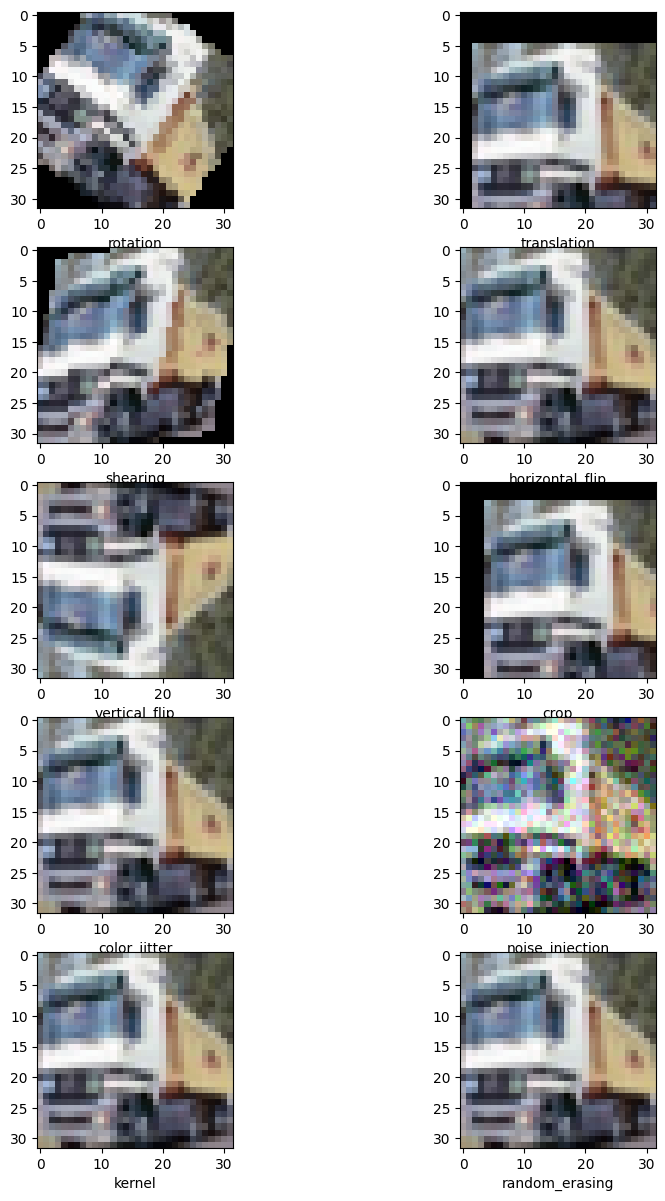

In [74]:
img = c10train[1][0]

img_tr = transformations["rotation"](img)

n = len(transformations)
n = n if not n % 2 else n + 1
plt.figure(figsize=(10,30))
for i, (transform_name, transform) in enumerate(transformations.items()):
    plt.subplot(n,2,i+1)
    if transform_name == "noise_injection":
        tr_img = noise_injection_compose(img)
    else:
        tr_img = transform(img)

    plt.imshow(tr_img)
    plt.xlabel(transform_name)

In [5]:
params = res["params"]

/users/local/b24richa/EDL/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Epoch: 0


KeyboardInterrupt: 

/users/local/b24richa/EDL/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Epoch: 0


KeyboardInterrupt: 

In [13]:
transformations

{'rotation': RandomRotation(degrees=[-45.0, 45.0], interpolation=InterpolationMode.NEAREST, expand=False, fill=0),
 'translation': RandomAffine(degrees=[0.0, 0.0], translate=(0.2, 0.2), interpolation=InterpolationMode.NEAREST, fill=0),
 'shearing': RandomAffine(degrees=[0.0, 0.0], shear=[10.0, 20.0, 0.0, 10.0], interpolation=InterpolationMode.NEAREST, fill=0),
 'horizontal_flip': RandomHorizontalFlip(p=0.5),
 'vertical_flip': RandomVerticalFlip(p=0.5),
 'crop': RandomCrop(size=(32, 32), padding=[4, 4, 4, 4], pad_if_needed=False, fill=0, padding_mode=constant),
 'color_jitter': ColorJitter(brightness=(0.5, 1.5), contrast=(0.5, 1.5), saturation=(0.5, 1.5), hue=(-0.1, 0.1)),
 'noise_injection': <function transforms.transforms.gaussian_noise(image)>,
 'kernel': GaussianBlur(kernel_size=(5, 5), sigma=[0.1, 2.0]),
 'random_erasing': RandomErasing(p=0.5, scale=(0.02, 0.33), ratio=(0.3, 3.3), value=[0.0], inplace=False),
 'cutout': <function transforms.transforms.cutout.<locals>._cutout(image)

In [ ]:
transform_test = transforms.Compose([
    transforms.ToTensor(),
])

### The data from CIFAR10 are already downloaded in the following folder


c10train = CIFAR10(rootdir,train=True,download=True, transform=transform_train)
c10test = CIFAR10(rootdir,train=False,download=True, transform=transform_test)

trainloader = DataLoader(c10train,batch_size=32,shuffle=True)
testloader = DataLoader(c10test,batch_size=32)

https://pytorch.org/vision/main/auto_examples/transforms/plot_cutmix_mixup.html#sphx-glr-auto-examples-transforms-plot-cutmix-mixup-py 

https://github.com/4uiiurz1/pytorch-auto-augment 

In [5]:
## number of target samples for the final dataset
num_train_examples = len(c10train)
num_samples_subset = 15000

## We set a seed manually so as to reproduce the results easily
seed  = 2147483647

## Generate a list of shuffled indices ; with the fixed seed, the permutation will always be the same, for reproducibility
indices = list(range(num_train_examples))
np.random.RandomState(seed=seed).shuffle(indices)## modifies the list in place

## We define the Subset using the generated indices
c10train_subset = torch.utils.data.Subset(c10train,indices[:num_samples_subset])
print(f"Initial CIFAR10 dataset has {len(c10train)} samples")
print(f"Subset of CIFAR10 dataset has {len(c10train_subset)} samples")

# Finally we can define anoter dataloader for the training data
trainloader_subset = DataLoader(c10train_subset,batch_size=32,shuffle=True)
### You can now use either trainloader (full CIFAR10) or trainloader_subset (subset of CIFAR10) to train your networks.

Initial CIFAR10 dataset has 50000 samples
Subset of CIFAR10 dataset has 15000 samples


In [6]:
def train(net, optimizer, criterion, epoch):
    print('\nEpoch: %d' % epoch)
    net.train()
    train_loss = 0
    correct = 0
    total = 0
    for batch_idx, (inputs, targets) in enumerate(trainloader_subset):
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()

    return train_loss


def test(net, criterion, epoch):
    global best_acc
    net.eval()
    test_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for batch_idx, (inputs, targets) in enumerate(testloader):
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = net(inputs)
            loss = criterion(outputs, targets)

            test_loss += loss.item()
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()

    # Save checkpoint.
    acc = 100.*correct/total
    if acc > best_acc:
        print('Saving..')
        state = {
            'net': net.state_dict(),
            'acc': acc,
            'epoch': epoch,
        }
        if not os.path.isdir('checkpoint'):
            os.mkdir('checkpoint')
        torch.save(state, './checkpoint/ckpt.pth')
        best_acc = acc

    return acc, test_loss

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [10]:
net = VGG('VGG19')
net = net.to(device)

In [14]:
algo_hyperparameters = {
    'lr': [0.1, 0.01, 0.001],
    'momentum': [0.9, 0.6],
    'weight_decay': [10e-4, 5e-4],
}

In [11]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01,
                      momentum=0.9, weight_decay=5e-4)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=200)

In [12]:
best_acc = 0
start_epoch = 0

In [ ]:
train_losses = []
test_losses = []
test_accs = []
for epoch in range(start_epoch, start_epoch+200):
    train_loss = train(net, optimizer, criterion, epoch)
    test_acc, test_loss = test(net, criterion, epoch)
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    test_accs.append(test_accs)
    scheduler.step()

In [ ]:
plt.plot(range(200), train_losses)
plt.plot(range(200), test_losses)
plt.legend(['train', 'validation'], prop={'size': 10})
plt.title('loss function', size=10)
plt.xlabel('epoch', size=10)
plt.ylabel('loss value', size=10)

In [ ]:
state = {
        'net': net.state_dict(),
        'model_name': 'VGG19'
}

torch.save(state, 'mybestmodel.pth')

In [7]:
checkpoint = torch.load('checkpoint/ckpt.pth')

In [10]:
checkpoint['acc'], checkpoint['epoch']

(84.33, 40)

In [3]:
# We load the dictionary
loaded_cpt = torch.load('trained_model_state.pth')

# Define the model
model = VGG(loaded_cpt["model_name"])

# Finally we can load the state_dict in order to load the trained parameters
model.load_state_dict(loaded_cpt['net'])


<All keys matched successfully>

In [6]:
def get_params(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [25]:
from models import (
    VGG, 
    ResNet18,
    DenseNet121,
    PreActResNet18,
    MobileNetV2,
    ResNeXt29_2x64d,
    RegNetX_200MF,
    SimpleDLA,
    DPN92,
)
import models
acc_params_dict = {

}

In [61]:
import pickle 
with open('hyperparameter_training_results.pkl', 'rb') as f:
    all_hyper_params = pickle.load(f)
    hyper_params = max(all_hyper_params, key=lambda x: x['acc'])

In [62]:
hyper_params

{'lr': 0.01,
 'momentum': 0.6,
 'weight_decay': 0.001,
 'batch_size': 32,
 'acc': 86.26}

In [41]:
lines = """VGG\t84.33%
ResNet18	93.02%
DenseNet121	95.04%
PreActResNet18	95.11%
MobileNetV2	94.43%
ResNeXt29_2x64d	94.82%
RegNetX_200MF	94.24%
SimpleDLA	94.89%
DPN92	95.16%""".split("\n")


In [42]:
networks = {line.split("\t")[0]: {"acc": float(line.split("\t")[1].replace("%", ""))}  for line in lines}

In [43]:
for model, data in networks.items():
    model_cls = getattr(models, model)
    if model == "VGG":
        model_obj = model_cls("VGG19")
    else:
        model_obj = model_cls()
    data["n_params"] = get_params(model_obj)

In [44]:
networks

{'VGG': {'acc': 84.33, 'n_params': 20040522},
 'ResNet18': {'acc': 93.02, 'n_params': 11173962},
 'DenseNet121': {'acc': 95.04, 'n_params': 6956298},
 'PreActResNet18': {'acc': 95.11, 'n_params': 11171146},
 'MobileNetV2': {'acc': 94.43, 'n_params': 2296922},
 'ResNeXt29_2x64d': {'acc': 94.82, 'n_params': 9128778},
 'RegNetX_200MF': {'acc': 94.24, 'n_params': 2321946},
 'SimpleDLA': {'acc': 94.89, 'n_params': 15142970},
 'DPN92': {'acc': 95.16, 'n_params': 34236634}}

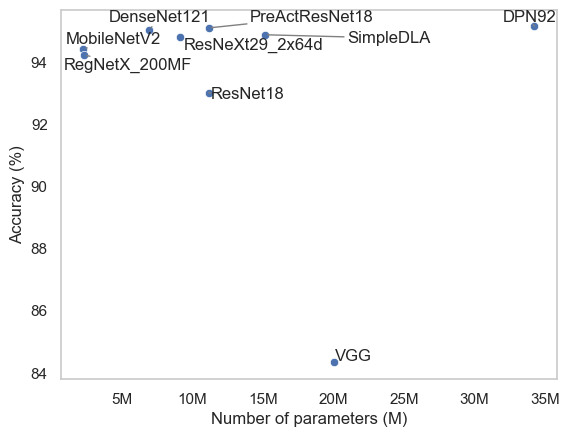

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
from adjustText import adjust_text
from matplotlib.ticker import FuncFormatter

x = [dict_["n_params"] for dict_ in networks.values()]
y = [dict_["acc"] for dict_ in networks.values()]
labels = networks.keys()

sns.scatterplot(x=x, y=y)
texts = []

for xi, yi, label in zip(x, y, labels):
    texts.append(plt.text(xi, yi, label))

adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray'))
formatter = FuncFormatter(lambda x, _: f'{x*1e-6:.0f}M')
plt.gca().xaxis.set_major_formatter(formatter)
plt.ylabel("Accuracy (%)")
plt.xlabel("Number of parameters (M)")
plt.grid(False)
plt.show()

In [ ]:
import pickle

with open("train_results.pkl", "rb") as f:
    res = pickle.load(f)

model, acc, train_accs, val_accs = res.values()

In [5]:
acc

90.44